In [2]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [14]:
#Import Data
data = pd.read_csv("VIX_FRED_data.csv")
data["Date"] = pd.to_datetime(data["Date"])
# Lag VIX by one month
data["Next Month VIX"] = data["VIX"].shift(-1)
#drop N/A
data = data.dropna()
data

,Date,Unemployment Rate,CPI,Three Month T Bill Rate,Six Month T Bill Rate,10-Year Treasury Constant Maturity Rate,Fed Rate,BBB Rate,SP500 Index,VIX,GDP,Initial Claims,JPY/USD Spot Rate,Total Nonfarm Employees,Spot Crude Oil Price,Next Month VIX
0,2014-10-01,5.7,237.430,0.02,0.05,2.30,0.09,3.50,2006.350,16.530,17912.079,1155000,108.03,139804,84.40,13.330
1,2014-11-01,5.8,236.983,0.02,0.07,2.33,0.09,3.63,2039.820,13.330,17912.079,1458000,116.30,140088,75.79,15.155
2,2014-12-01,5.6,236.252,0.03,0.11,2.21,0.12,3.78,2063.890,15.155,17912.079,1138000,119.32,140366,59.29,19.455
3,2015-01-01,5.7,234.747,0.03,0.08,1.88,0.11,3.64,2024.465,19.455,18063.529,1438000,118.25,140562,47.22,15.450
4,2015-02-01,5.5,235.342,0.02,0.07,1.98,0.11,3.65,2096.990,15.450,18063.529,1205000,118.76,140831,50.58,15.065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2024-04-01,3.9,313.207,5.24,5.15,4.54,5.33,5.84,5108.065,15.745,29016.714,841000,153.89,158214,85.35,12.920
115,2024-05-01,4.0,313.225,5.25,5.17,4.48,5.33,5.75,5256.815,12.920,29016.714,892000,155.87,158430,80.02,12.645
116,2024-06-01,4.1,313.049,5.24,5.15,4.31,5.33,5.63,5433.740,12.645,29016.714,1184000,157.86,158548,79.77,13.190
117,2024-07-01,4.3,313.534,5.20,5.01,4.25,5.33,5.53,5550.165,13.190,29016.714,953000,157.52,158692,81.80,16.690


In [15]:
summary_stats = data.drop(columns='Date').describe()
summary_stats

,Unemployment Rate,CPI,Three Month T Bill Rate,Six Month T Bill Rate,10-Year Treasury Constant Maturity Rate,Fed Rate,BBB Rate,SP500 Index,VIX,GDP,Initial Claims,JPY/USD Spot Rate,Total Nonfarm Employees,Spot Crude Oil Price,Next Month VIX
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,1.190000e+02,119.000000,119.000000,119.000000,119.000000
mean,4.725210,264.562462,1.641597,1.729076,2.420672,1.639748,3.997311,3244.222689,17.765504,22325.621218,1.621101e+06,118.984202,148247.621849,62.076471,17.770042
std,1.744299,25.273533,1.832483,1.800726,1.008435,1.812715,1.113819,1008.242128,6.776378,3498.987710,2.138832e+06,14.757919,5745.953127,18.375908,6.775724
min,3.400000,234.747000,0.020000,0.040000,0.620000,0.050000,2.120000,1906.900000,10.005000,17912.079000,7.910000e+05,101.240000,130421.000000,16.550000,10.005000
25%,3.700000,244.005000,0.115000,0.160000,1.735000,0.120000,3.320000,2361.950000,13.290000,19359.363500,8.965000e+05,108.910000,143878.500000,48.620000,13.290000
50%,4.200000,256.036000,0.980000,1.110000,2.300000,1.040000,3.780000,2905.030000,15.870000,21397.938000,1.066000e+06,112.820000,148280.000000,59.270000,15.870000
75%,5.050000,286.044000,2.360000,2.440000,2.905000,2.385000,4.630000,4133.835000,20.695000,25215.491000,1.270000e+06,123.515000,151860.000000,75.930000,20.695000
max,14.800000,314.121000,5.340000,5.330000,4.800000,5.330000,6.550000,5550.165000,59.415000,29016.714000,1.865300e+07,157.860000,158851.000000,114.840000,59.415000


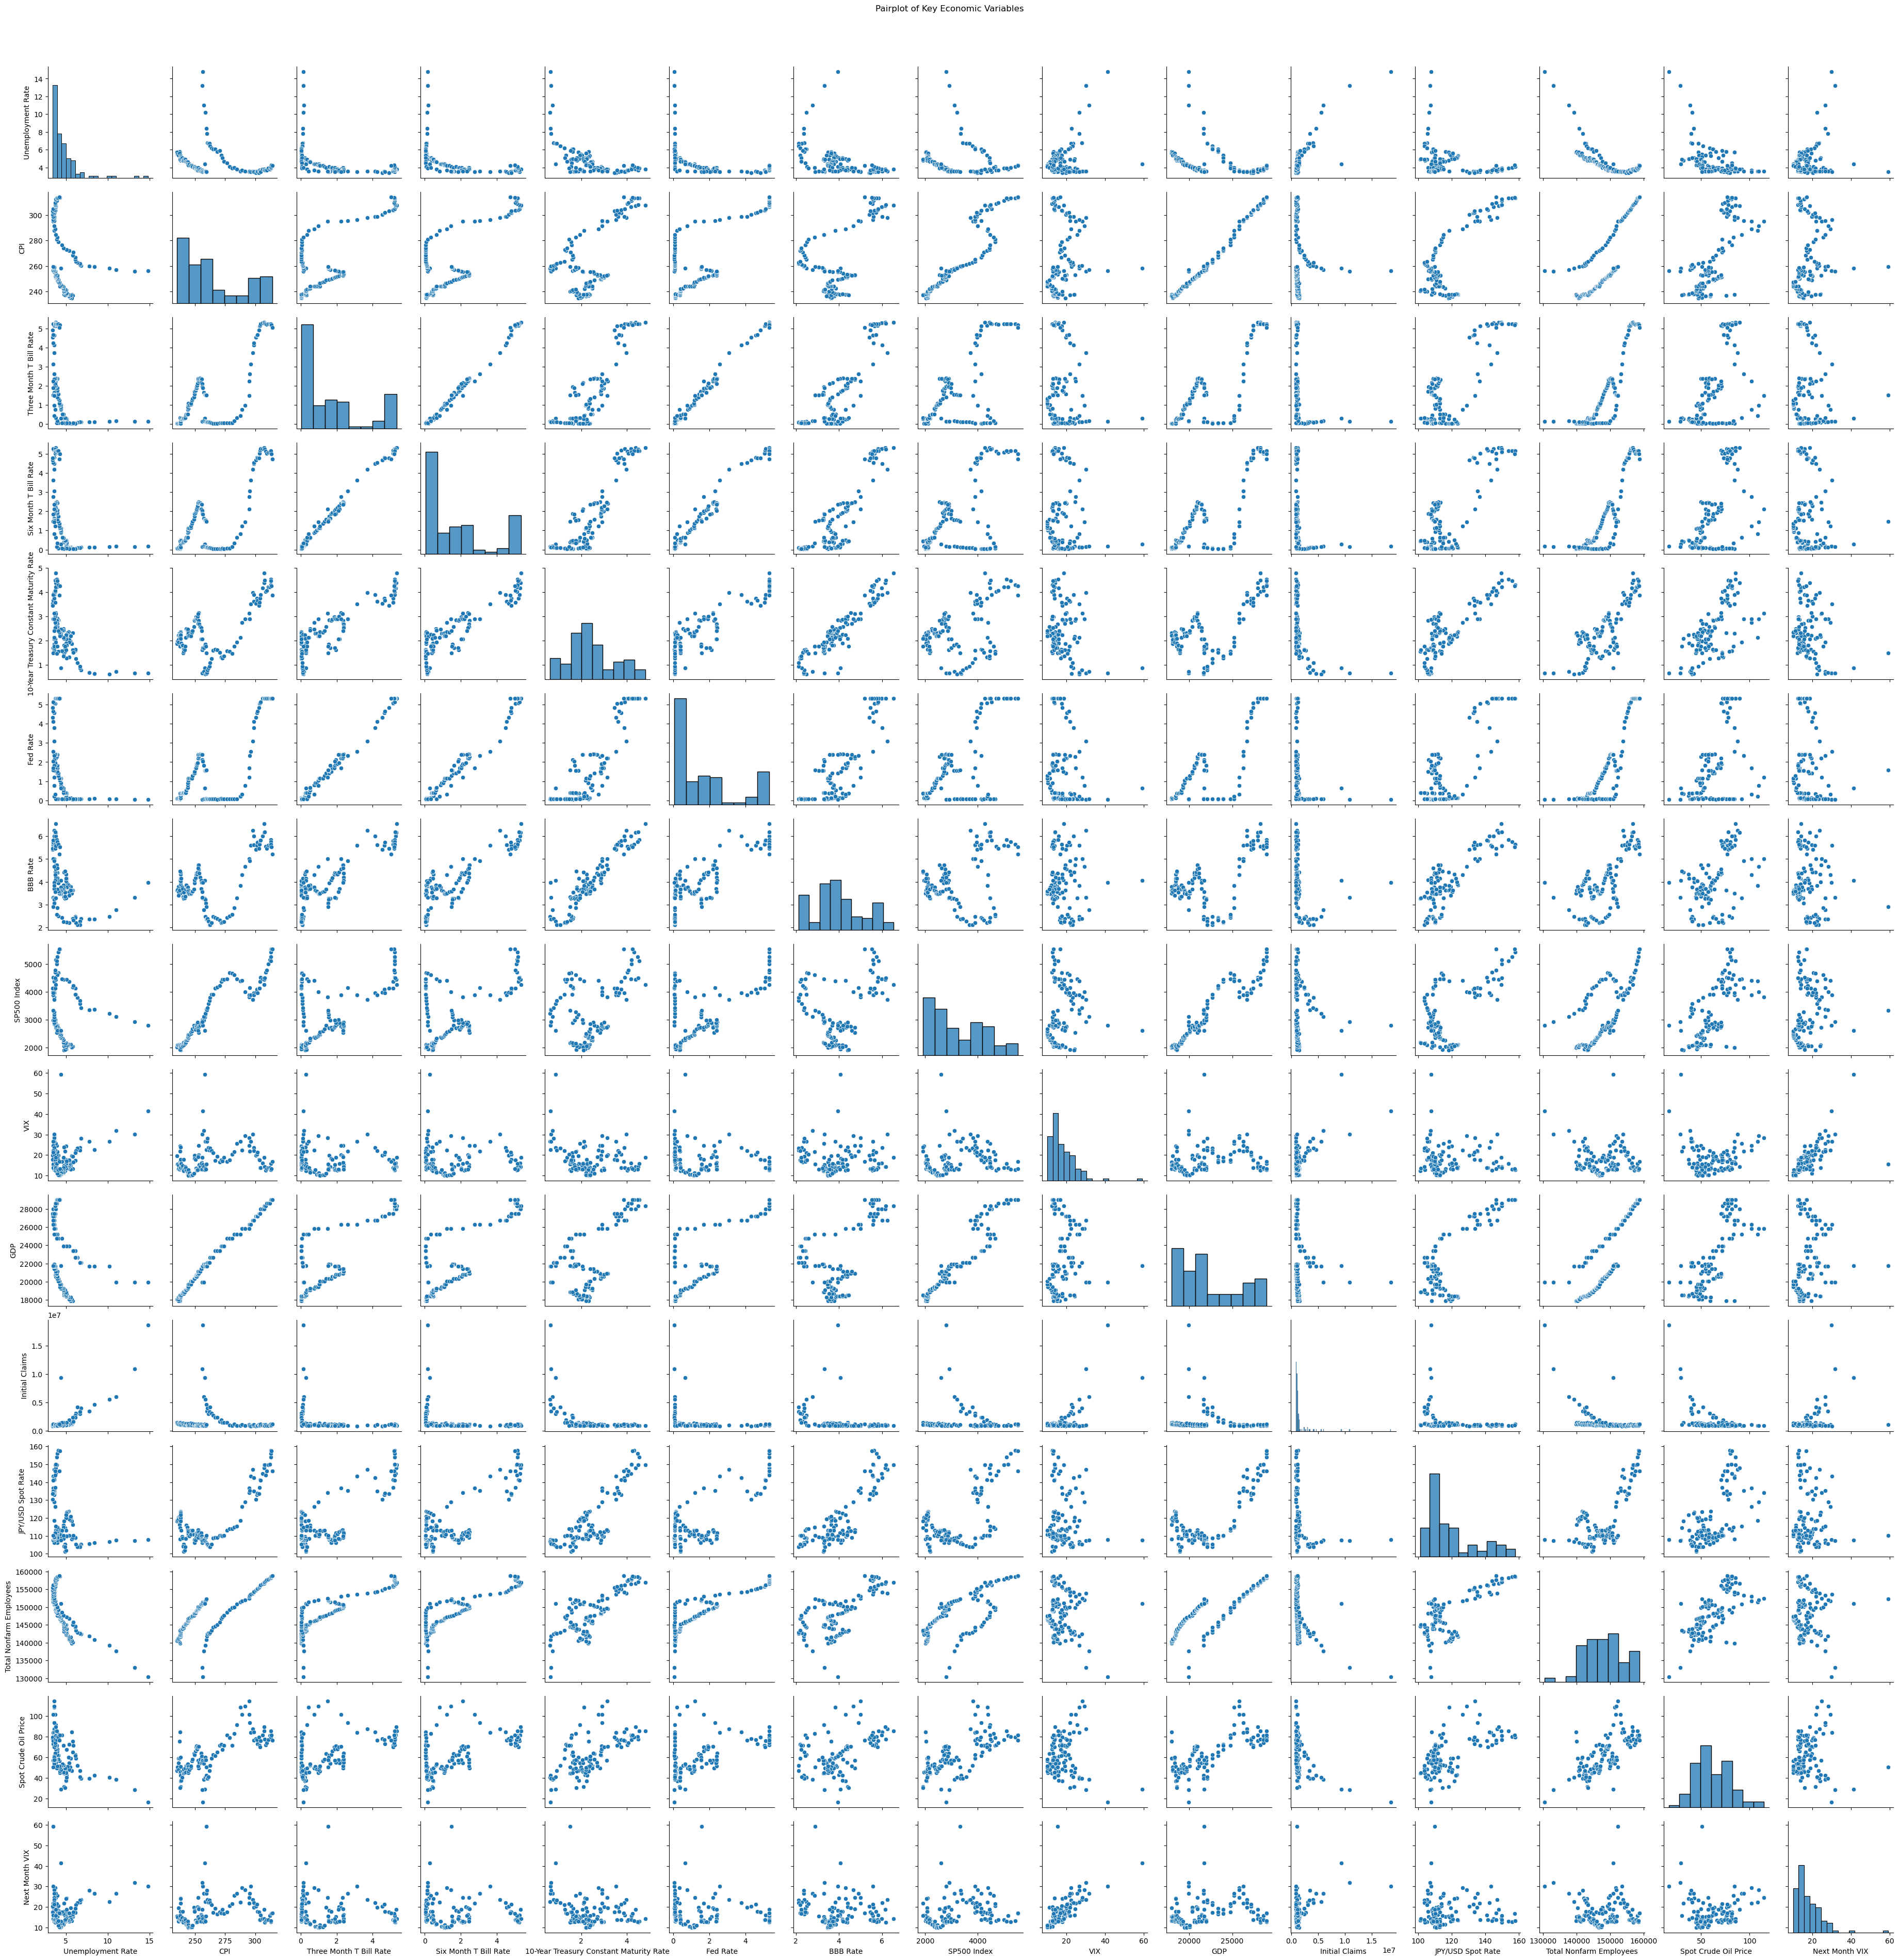

In [16]:
sns.pairplot(data[data.drop(columns='Date').columns.values.tolist()])
plt.suptitle('Pairplot of Key Economic Variables', y=1.02)
plt.show()

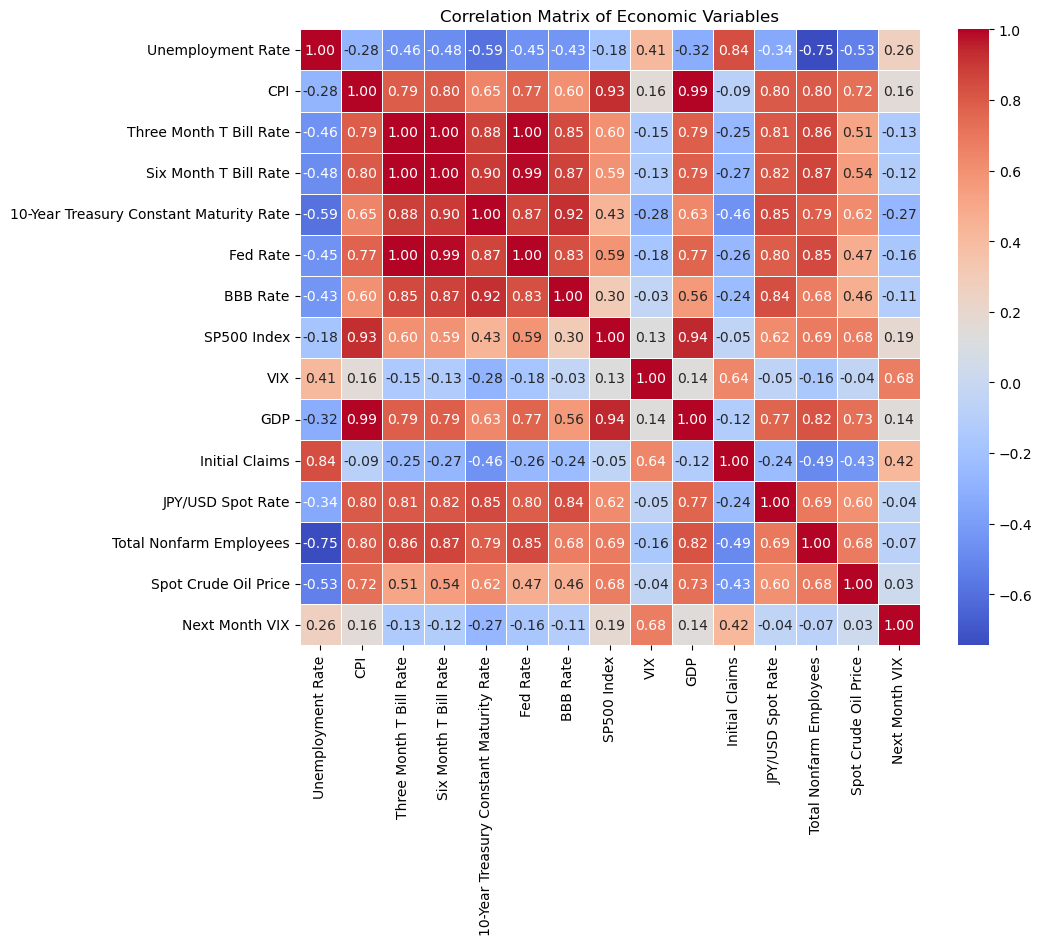

In [17]:
corr_matrix = data.drop(columns=["Date"]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Economic Variables')
plt.show()

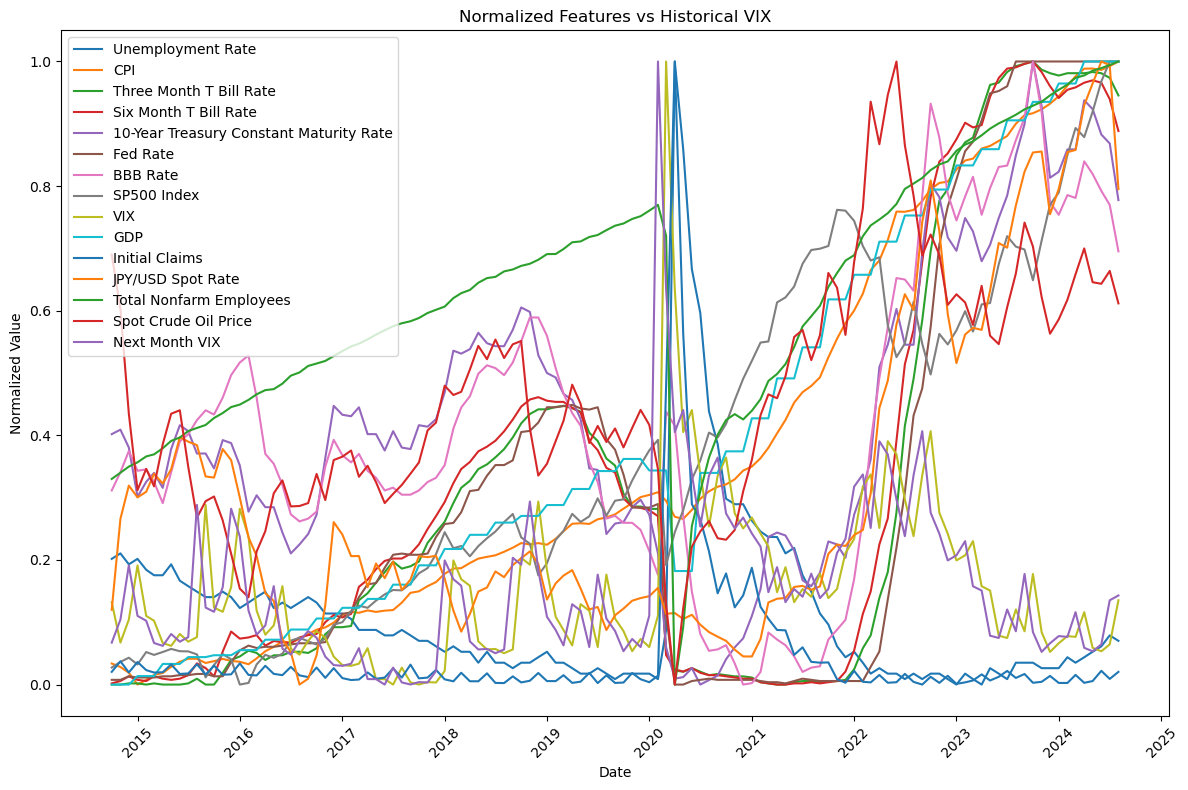

In [18]:
# Normalize the selected features along with VIX for plotting
features_to_normalize = data.drop(columns=["Date"]).columns

# Normalize using Min-Max scaling
normalized_data = data[features_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Plot the normalized features together with VIX
plt.figure(figsize=(12, 8))
for column in normalized_data.columns:
    plt.plot(data['Date'], normalized_data[column], label=column)

plt.xticks(rotation=45)
plt.title('Normalized Features vs Historical VIX')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.tight_layout()
plt.show()

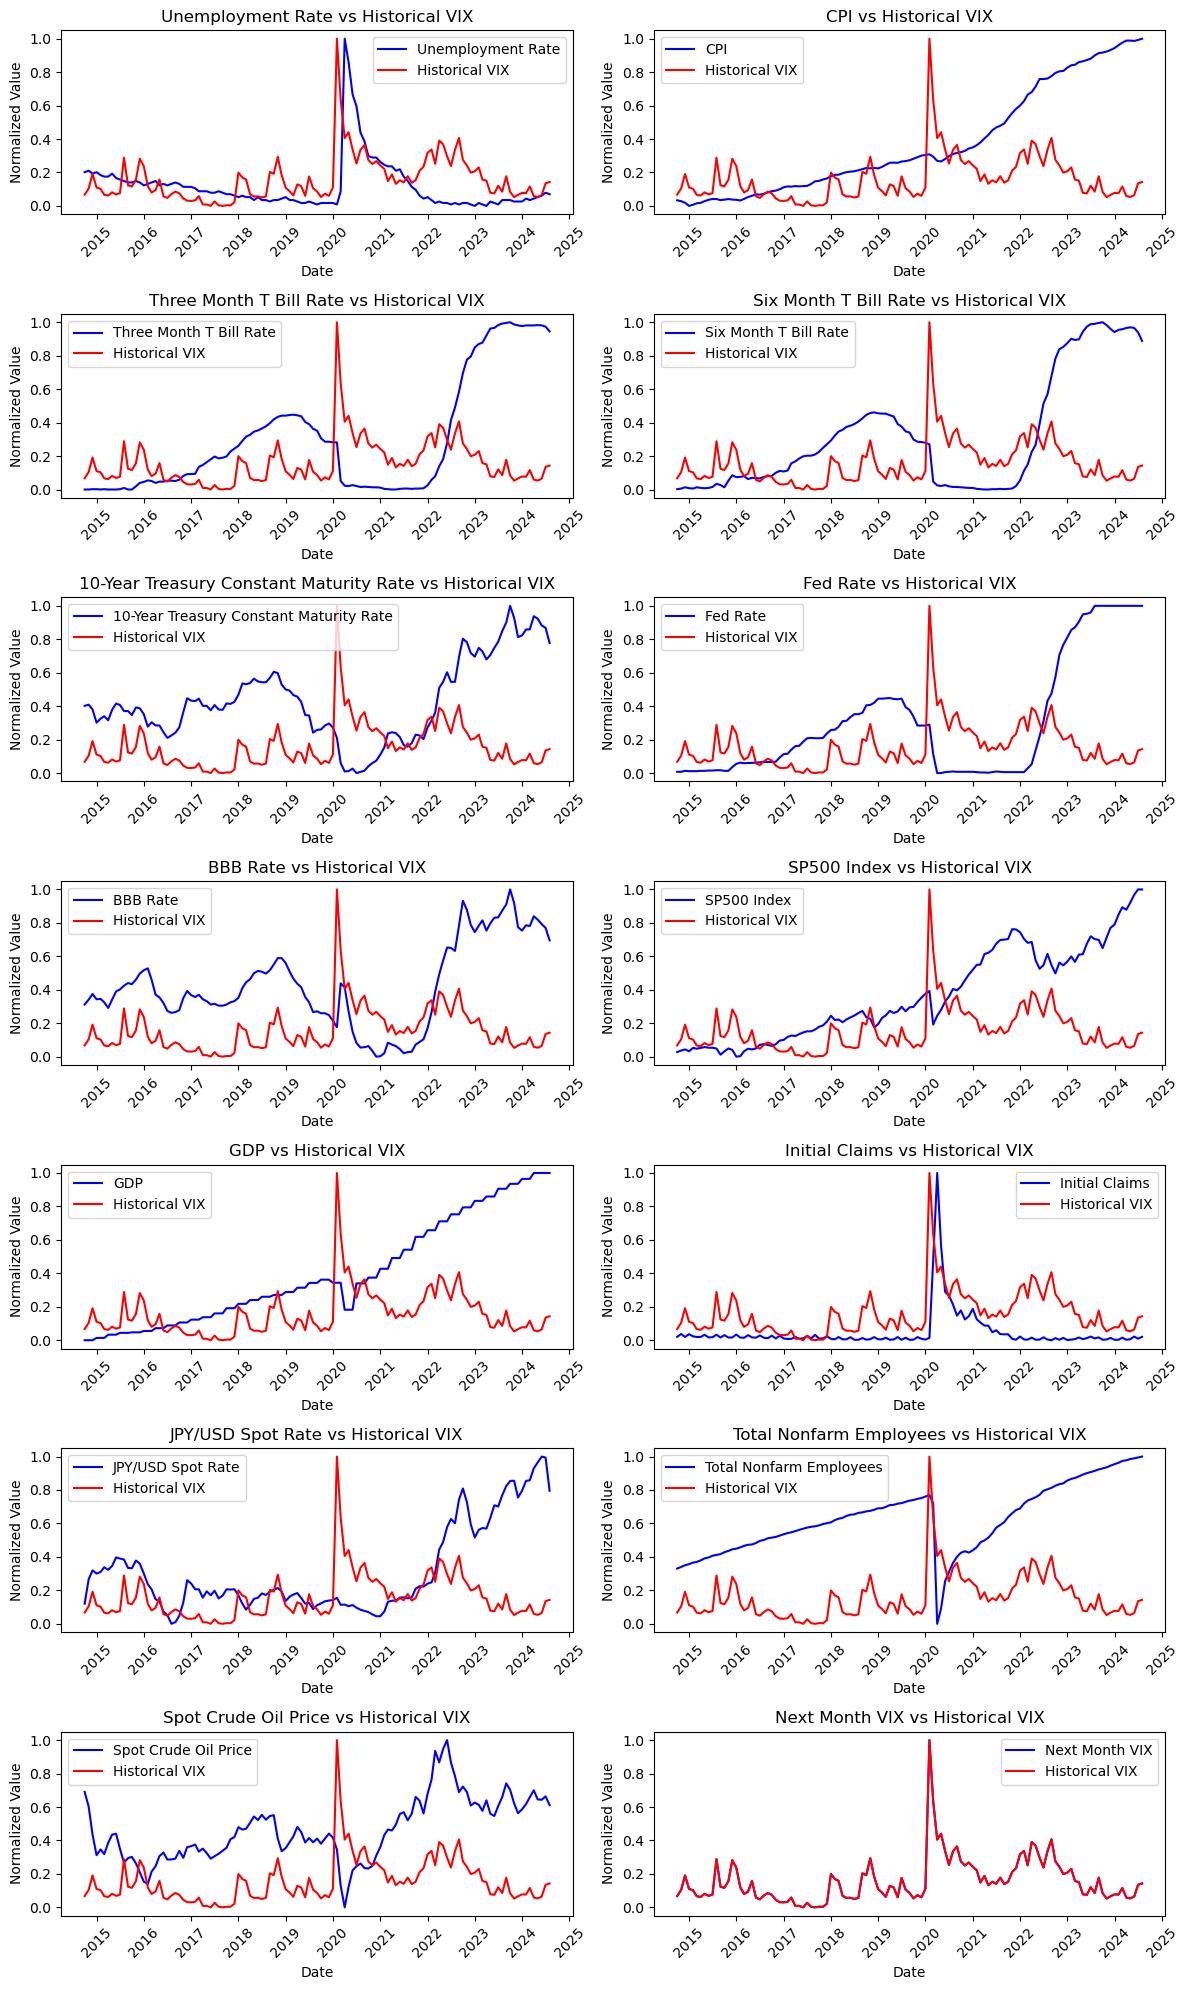

In [20]:
# Create individual plots for each feature along with VIX
features = data.drop(columns=["Date","VIX"]).columns

plt.figure(figsize=(12, 20))

for i, feature in enumerate(features, 1):
    plt.subplot(int(math.ceil(len(features)/2)), 2, i)
    plt.plot(data['Date'], normalized_data[feature], label=feature, color='blue')
    plt.plot(data['Date'], normalized_data['Next Month VIX'], label='Historical VIX', color='red')
    plt.xticks(rotation=45)
    plt.title(f'{feature} vs Historical VIX')
    plt.xlabel('Date')
    plt.ylabel('Normalized Value')
    plt.legend()

plt.tight_layout()
plt.show()

In [38]:
#Import Data
yf_data = pd.read_csv("VIX_YF_data.csv")
yf_data["Date"] = pd.to_datetime(yf_data["Date"])
# Lag VIX by one month
yf_data["Next Month VIX"] = yf_data["VIX"].shift(-1)
# Drop N/A
yf_data = yf_data.dropna()
# Create a new column for difference between high and low for each index
indexes = ['DJI', 'NASDAQ', 'GOLD', 'OIL', 'FTSE', 'NIKKEI', 'RUSSELL2000']
for index in indexes:
    yf_data[index+' High Minus Low'] = yf_data[index+' High'] - yf_data[index+' Low']
# Remove all open and close prices
yf_data = yf_data.drop(columns=['DJI Open', 'DJI Close', 'NASDAQ Open', 'NASDAQ Close', 'GOLD Open', 'GOLD Close', 'OIL Open', 'OIL Close', 'FTSE Open', 'FTSE Close', 'NIKKEI Open', 'NIKKEI Close', 'RUSSELL2000 Open', 'RUSSELL2000 Close'])
yf_data

,Date,SP500 Open,SP500 High,SP500 Volume,NASDAQ High,NASDAQ Low,NASDAQ Adj Close,NASDAQ Volume,DJI High,DJI Low,...,OIL Volume,VIX,Next Month VIX,DJI High Minus Low,NASDAQ High Minus Low,GOLD High Minus Low,OIL High Minus Low,FTSE High Minus Low,NIKKEI High Minus Low,RUSSELL2000 High Minus Low
0,2014-10-01,1971.439941,2018.189941,93714040000,4641.509766,4116.600098,4630.740234,50136190000,17395.539062,15855.120117,...,22051206,16.530,13.330,1540.418945,524.909668,8.839996,38.559998,550.099609,2004.879883,133.859985
1,2014-11-01,2018.209961,2075.760010,63600190000,4810.859863,4594.919922,4791.629883,32967990000,17894.830078,17278.359375,...,26087667,13.330,15.155,616.470703,215.939941,6.290001,42.080002,328.200195,807.169922,39.780029
2,2014-12-01,2065.780029,2093.550049,80743820000,4814.950195,4547.310059,4736.049805,39587090000,18103.449219,17067.589844,...,60335993,15.155,19.455,1035.859375,267.640137,6.579994,52.399994,608.500000,1357.890625,86.929932
3,2015-01-01,2058.899902,2072.360107,77330040000,4777.009766,4563.109863,4635.240234,38719030000,17951.779297,17136.300781,...,83013319,19.455,15.450,815.478516,213.899902,13.260002,32.400009,566.799805,1258.019531,61.500000
4,2015-02-01,1996.670044,2119.590088,68775560000,4989.250000,4580.459961,4963.529785,35773090000,18244.380859,17037.759766,...,93894742,15.450,15.065,1206.621094,408.790039,8.870003,21.680008,235.200195,1593.521484,85.880005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2024-04-01,5257.970215,5263.950195,81747170000,16490.650391,15222.780273,15657.820312,107535290000,39815.000000,37611.558594,...,107181600,15.745,12.920,2203.441406,1267.870117,18.800003,5.840004,406.100098,3964.160156,194.520020
115,2024-05-01,5029.029785,5341.879883,86849720000,17032.660156,15557.639648,16735.019531,140039820000,40077.398438,37780.539062,...,63365200,12.920,12.645,2296.859375,1475.020508,14.949997,4.500000,363.000488,1820.160156,144.290039
116,2024-06-01,5297.149902,5523.640137,76025620000,18035.000000,16646.429688,17732.599609,107772060000,39571.230469,38247.218750,...,41372900,12.645,13.190,1324.011719,1388.570312,8.430008,9.599998,258.800293,1838.429688,95.300049
117,2024-07-01,5471.080078,5669.669922,80160390000,18671.070312,17015.380859,17599.400391,119005630000,41376.000000,39037.941406,...,49747700,13.190,16.690,2338.058594,1655.689453,15.159988,8.599998,343.900391,4815.578125,280.939941


In [39]:
yf_summary_stats = yf_data.drop(columns='Date').describe()
yf_summary_stats

,SP500 Open,SP500 High,SP500 Volume,NASDAQ High,NASDAQ Low,NASDAQ Adj Close,NASDAQ Volume,DJI High,DJI Low,DJI Adj Close,...,OIL Volume,VIX,Next Month VIX,DJI High Minus Low,NASDAQ High Minus Low,GOLD High Minus Low,OIL High Minus Low,FTSE High Minus Low,NIKKEI High Minus Low,RUSSELL2000 High Minus Low
count,119.000000,119.000000,1.190000e+02,119.000000,119.000000,119.000000,1.190000e+02,119.000000,119.000000,119.000000,...,1.190000e+02,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,3221.627802,3333.608658,8.392949e+10,9792.034007,8962.583857,9468.552927,7.043931e+10,27701.600725,25915.556074,26975.539169,...,9.348979e+07,17.765504,17.770042,1786.044651,829.450150,8.812605,13.013781,423.208406,1907.461307,146.023702
std,999.099298,1039.762210,1.485759e+10,4053.641059,3663.804270,3899.319584,3.250052e+10,7155.198215,6755.687396,6989.916012,...,7.559684e+07,6.776378,6.775724,1171.089868,567.856273,4.254481,9.052331,216.464339,1057.754225,84.806513
min,1919.650024,1962.959961,6.303151e+10,4636.930176,4116.600098,4557.950195,3.296799e+10,16795.980469,15370.330078,16284.700195,...,2.205121e+07,10.005000,10.005000,440.011719,158.669922,2.930000,2.160000,191.200195,344.230469,32.409912
25%,2371.234985,2399.569946,7.520388e+10,6001.050049,5787.270020,5979.675049,4.174690e+10,21091.610352,20105.320312,20876.375000,...,5.968494e+07,13.290000,13.290000,953.544922,349.939941,5.799999,7.464996,296.600098,1248.655273,81.790039
50%,2952.330078,3021.989990,8.097057e+10,8335.559570,7777.089844,8109.540039,4.962266e+10,27071.330078,25208.000000,26403.279297,...,8.254402e+07,15.870000,15.870000,1529.992188,736.200195,7.160004,10.239998,376.899902,1684.990234,123.400024
75%,4121.494873,4224.939941,8.943409e+10,13667.424805,12356.395020,12911.785156,9.956806e+10,34308.029297,32576.080078,33210.699219,...,1.061363e+08,20.695000,20.695000,2261.829102,1185.145020,11.110008,15.559998,491.549805,2247.729492,189.045044
max,5537.839844,5669.669922,1.621854e+11,18671.070312,17015.380859,17732.599609,1.429268e+11,41585.210938,39037.941406,41563.078125,...,7.668190e+08,59.415000,59.415000,8888.689453,2757.489258,23.250000,52.399994,1957.500000,7625.439453,573.520020


In [44]:
# Combine data from both sources
merge_data = data.drop(columns=['VIX','Next Month VIX'])
all_data = pd.merge(merge_data, yf_data, on='Date', how='inner')


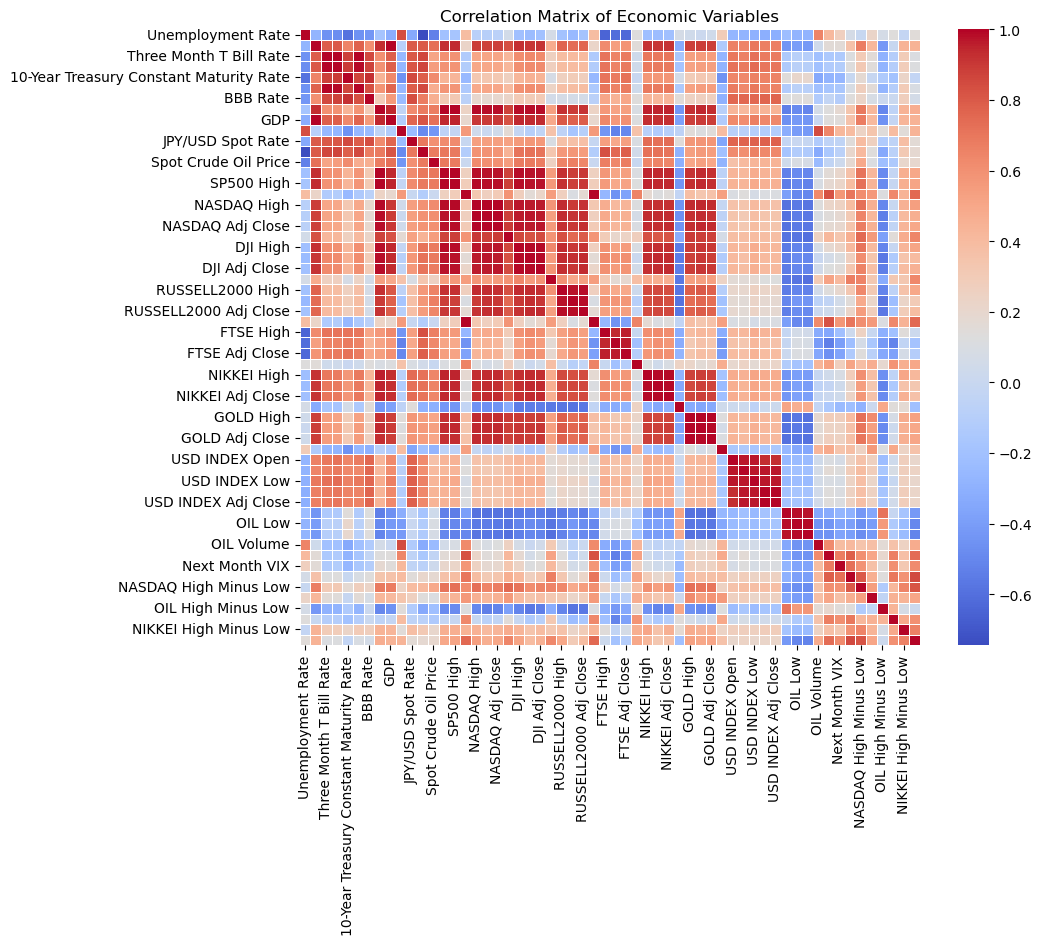

In [46]:
corr_matrix = all_data.drop(columns=["Date"]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Economic Variables')
plt.show()

In [54]:
# Print Variables with High Correlation to Next Month VIX
high_corr_vars = corr_matrix['Next Month VIX'].sort_values(ascending=False)
high_corr_vars
high_corr_vars.to_csv("Variable Correlations.csv")